# Regression

## Load useful packages

Before we start, let's load some packages: [numpy](https://numpy.org) (for matrix manipulations), [cvxpy](https://www.cvxpy.org) (convex optimisation) and [matplotlib](https://matplotlib.org) (plotting).

Note: if you are using anaconda python you may not have cvxpy installed by default. Install it using the command ``conda install -c conda-forge cvxpy``.

In [1]:
import numpy as np
import numpy.linalg as npl 
import cvxpy as cp
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
np.random.seed(100)

## Linear regression

### Model fitting

Imagine we have some data taken from an experiment and we would like to find a model that fits the data well.

Here is some data I took earlier. Can you figure out a good model for this data? How would you verify that your model is a good fit for the data? Once you have a good idea for a model, try using the `linear_model.LinearRegression` function from scikit-learn to test it with the data. How would you verify that your model is a good fit for the data?

In [2]:
data = np.array(
 [[ 0.00000000e+00,  0.00000000e+00],
  [ 6.34665183e-01, -3.17875519e+01],
  [ 1.26933037e+00, -2.32023022e+01],
  [ 1.90399555e+00,  3.79419670e+01],
  [ 2.53866073e+00,  1.26075199e+02],
  [ 3.17332591e+00,  1.89220638e+02],
  [ 3.80799110e+00,  1.76675134e+02],
  [ 4.44265628e+00,  6.91241418e+01],
  [ 5.07732146e+00, -1.04652717e+02],
  [ 5.71198664e+00, -2.74474035e+02],
  [ 6.34665183e+00, -3.57770145e+02],
  [ 6.98131701e+00, -2.98688617e+02],
  [ 7.61598219e+00, -9.91420759e+01],
  [ 8.25064737e+00,  1.73982909e+02],
  [ 8.88531256e+00,  4.11258797e+02],
  [ 9.51997774e+00,  5.05229741e+02],
  [ 1.01546429e+01,  3.98655562e+02],
  [ 1.07893081e+01,  1.14999569e+02],
  [ 1.14239733e+01, -2.43965862e+02],
  [ 1.20586385e+01, -5.35019383e+02],
  [ 1.26933037e+01, -6.31303684e+02],
  [ 1.33279688e+01, -4.77509750e+02],
  [ 1.39626340e+01, -1.18487622e+02],
  [ 1.45972992e+01,  3.12664733e+02],
  [ 1.52319644e+01,  6.44441084e+02],
  [ 1.58666296e+01,  7.35819517e+02],
  [ 1.65012947e+01,  5.36287512e+02],
  [ 1.71359599e+01,  1.11438637e+02],
  [ 1.77706251e+01, -3.78178709e+02],
  [ 1.84052903e+01, -7.38308389e+02],
  [ 1.90399555e+01, -8.18728004e+02],
  [ 1.96746207e+01, -5.76123818e+02],
  [ 2.03092858e+01, -9.57201989e+01],
  [ 2.09439510e+01,  4.38649084e+02],
  [ 2.15786162e+01,  8.15508541e+02],
  [ 2.22132814e+01,  8.80102753e+02],
  [ 2.28479466e+01,  5.98248128e+02],
  [ 2.34826118e+01,  7.32287795e+01],
  [ 2.41172769e+01, -4.92265228e+02],
  [ 2.47519421e+01, -8.75034822e+02],
  [ 2.53866073e+01, -9.20139537e+02],
  [ 2.60212725e+01, -6.03980010e+02],
  [ 2.66559377e+01, -4.58833816e+01],
  [ 2.72906028e+01,  5.37270415e+02],
  [ 2.79252680e+01,  9.15989573e+02],
  [ 2.85599332e+01,  9.39155313e+02],
  [ 2.91945984e+01,  5.94724544e+02],
  [ 2.98292636e+01,  1.56191361e+01],
  [ 3.04639288e+01, -5.71967517e+02],
  [ 3.10985939e+01, -9.37586936e+02],
  [ 3.17332591e+01, -9.37586936e+02],
  [ 3.23679243e+01, -5.71967517e+02],
  [ 3.30025895e+01,  1.56191361e+01],
  [ 3.36372547e+01,  5.94724544e+02],
  [ 3.42719199e+01,  9.39155313e+02],
  [ 3.49065850e+01,  9.15989573e+02],
  [ 3.55412502e+01,  5.37270415e+02],
  [ 3.61759154e+01, -4.58833816e+01],
  [ 3.68105806e+01, -6.03980010e+02],
  [ 3.74452458e+01, -9.20139537e+02],
  [ 3.80799110e+01, -8.75034822e+02],
  [ 3.87145761e+01, -4.92265228e+02],
  [ 3.93492413e+01,  7.32287795e+01],
  [ 3.99839065e+01,  5.98248128e+02],
  [ 4.06185717e+01,  8.80102753e+02],
  [ 4.12532369e+01,  8.15508541e+02],
  [ 4.18879020e+01,  4.38649084e+02],
  [ 4.25225672e+01, -9.57201989e+01],
  [ 4.31572324e+01, -5.76123818e+02],
  [ 4.37918976e+01, -8.18728004e+02],
  [ 4.44265628e+01, -7.38308389e+02],
  [ 4.50612280e+01, -3.78178709e+02],
  [ 4.56958931e+01,  1.11438637e+02],
  [ 4.63305583e+01,  5.36287512e+02],
  [ 4.69652235e+01,  7.35819517e+02],
  [ 4.75998887e+01,  6.44441084e+02],
  [ 4.82345539e+01,  3.12664733e+02],
  [ 4.88692191e+01, -1.18487622e+02],
  [ 4.95038842e+01, -4.77509750e+02],
  [ 5.01385494e+01, -6.31303684e+02],
  [ 5.07732146e+01, -5.35019383e+02],
  [ 5.14078798e+01, -2.43965862e+02],
  [ 5.20425450e+01,  1.14999569e+02],
  [ 5.26772102e+01,  3.98655562e+02],
  [ 5.33118753e+01,  5.05229741e+02],
  [ 5.39465405e+01,  4.11258797e+02],
  [ 5.45812057e+01,  1.73982909e+02],
  [ 5.52158709e+01, -9.91420759e+01],
  [ 5.58505361e+01, -2.98688617e+02],
  [ 5.64852012e+01, -3.57770145e+02],
  [ 5.71198664e+01, -2.74474035e+02],
  [ 5.77545316e+01, -1.04652717e+02],
  [ 5.83891968e+01,  6.91241418e+01],
  [ 5.90238620e+01,  1.76675134e+02],
  [ 5.96585272e+01,  1.89220638e+02],
  [ 6.02931923e+01,  1.26075199e+02],
  [ 6.09278575e+01,  3.79419670e+01],
  [ 6.15625227e+01, -2.32023022e+01],
  [ 6.21971879e+01, -3.17875519e+01],
  [ 6.28318531e+01,  0.00000000e+00]])

#### Analysis

Here is how I created that mystery data:

In [3]:
x = np.linspace(0, 20*np.pi, 100)
y = (x**2 - 20*np.pi*x)*np.cos(x)
data = np.array([x,y]).T

The first thing we should do is try to plot the data to see if we can recognise anything

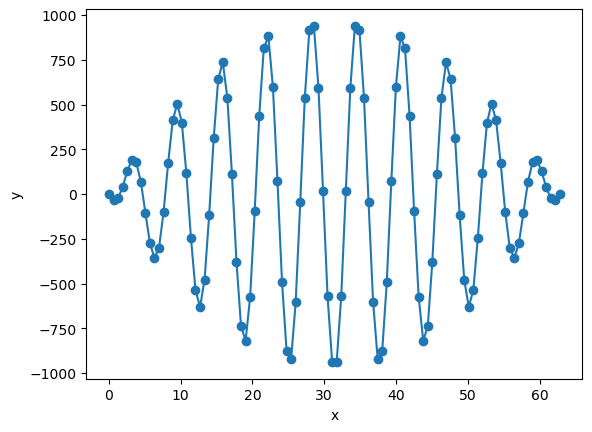

In [4]:
p1 = plt.plot(x,y,'o-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If we have a good idea for a model that might fit the data, then we can use `linear_model.LinearRegression` to look for the parameters that best fit the data. This looks like the plot of cos(x) modulated by a quadratic so let's try to fit a linear model of that form to the data:

In [5]:
X = np.array([np.cos(x),x * np.cos(x), x**2 * np.cos(x)]).T
fit = LinearRegression().fit(X,y)
fit.coef_

array([-2.95037551e-11, -6.28318531e+01,  1.00000000e+00])

Now we plot the model against the data

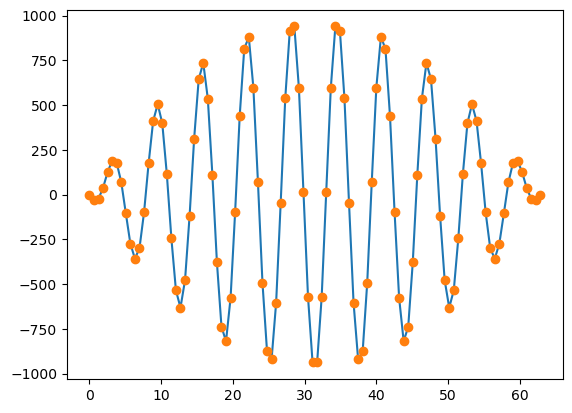

In [6]:
plt.plot(x,fit.predict(X),"-",x,y,"o")
plt.show()

Now that we have seen a simple example, let's apply what we have learned in the lectures to see if we can reproduce this and in the process understand what Python has done to find a good fit to the data.

### Linear regression for a linear function

We will start with a simple problem: find the line that best fits some data by determining the best fit parameters ($\beta_0$, $\beta_1$) in our model $f(x)=\beta_0 + \beta_1 x$.

The first thing we need is to collect some data samples. Normally, this could come from some experimental measurements, but for this example we will just generate some data ourselves.  In the real world we will never have perfectly clean measurements so we will expect some random noise in our samples. To simulate this, we will add some random noise when we're generating the data we want to fit.

In [7]:
x = np.linspace(0,5,11)
y = 3 + 2 * x + 0.3*np.random.randn(11)

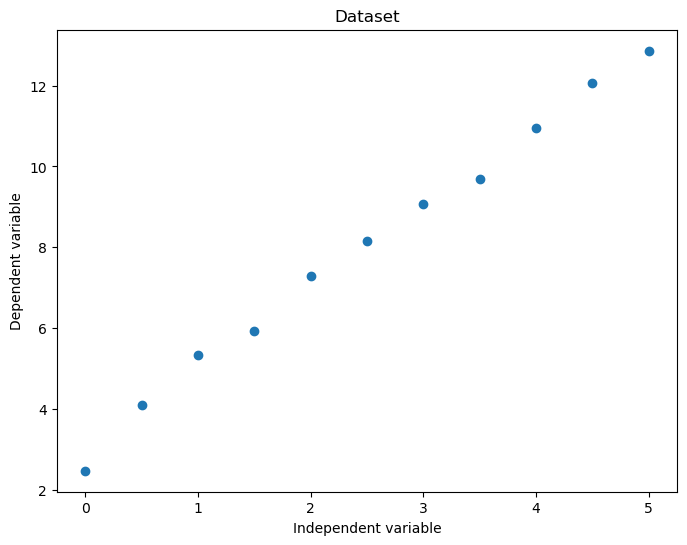

In [8]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.title("Dataset")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()

If we have a good idea for a model that might fit the data, then we can use _regression_ to look for the parameters that best fit the data. In this case it looks like we should consider a straight line $y(x)= \beta_1 x + \beta_0$ as a model. To fit the model to the data, we can use our data samples to write an (overdetermined) linear system of equations $ X \beta = y$, where
$$ X = \begin{pmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \quad y = \begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix}, \quad \beta = \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}$$
The matrix $X$ is an example where we have many rows but only two columns so this is an **over-constrained** problem (equivalently, the points don't all sit exactly on a line). As such we won't be able to find a perfect solution ($y$ is not in the column space of $X$). Instead, we can try to find the line that "best" fits the data. If we define "best" to mean the line that minimises the square of the 2-norm $||X\beta - y||^2$ then this leads us to regression, in which we instead solve the system $X^T X \beta = X^T y$, which does have a solution for $\beta_0$ and $\beta_1$. 

Before proceeding we will create our matrix $X$.

In [9]:
X = np.array([np.ones(11),x]).T
X.shape

(11, 2)

### Fitting model using pseudo-inverse
The first method we could use to fit our model to the data is by using SVD and pseudo-inverse.

We first compute the SVD decomposition of matrix $X$.

In [10]:
U,Svec,VT = npl.svd(X)
print(Svec)

[10.21524026  1.70260578]


We now build its pseudo-inverse $X^\dagger$.

In [11]:
#Explicitly create the pseudoinverse
Sdag = np.zeros(X.T.shape)
np.fill_diagonal(Sdag,1/Svec)

Xpinv = VT.T@Sdag@U.T
Xpinv.shape

(2, 11)

We finally apply the pseudoinverse to $y$ and visualise the final result.

In [12]:
beta = Xpinv@y
print(beta)

[2.99741335 1.99828196]


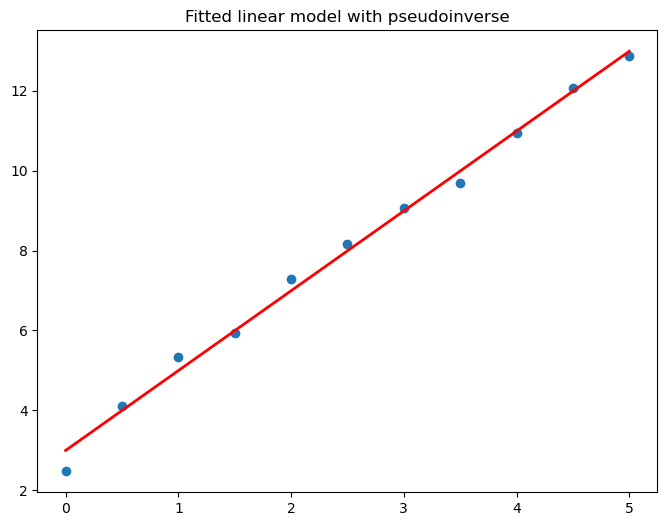

In [13]:
xline = np.array([x[0],x[-1]])
yline = beta[0]+beta[1]*xline
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y,label='Data')
plt.plot(xline,yline,color='r',linestyle='-',linewidth=2,label='Fitted model')
plt.title("Fitted linear model with pseudoinverse")
plt.show()

### Fitting model using normal equations

The second method we can use is the method of normal equations, for which we need to formulate the problem as an optimisation problem.

Considering the system of equations:
$$ y = X \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix} + \epsilon$$
where $\epsilon$ is a vector of vertical distances of the points from the best fit line,
then, the optimisation problem is
$$\min_{\beta} f(\beta) = || X\beta-y ||^2$$

Since this is a convex optimisation problem, we can then find the solution by looking for the stationary point, i.e., by checking when the gradient $X^T(X\beta-y)$ vanishes.

This leads to the system of normal equations (i.e. using using $X^T$ to project onto the column space of $X$)
$$ X^TX\beta = X^T y$$
Note that $(X^T X)^{-1}$ exists when $X$ has independent columns [$N(A) = N(A^T A)$].

Let's try to build it and solve it.

In [14]:
beta2 = npl.solve(X.T@X,X.T@y)
print(beta2)

[2.99741335 1.99828196]


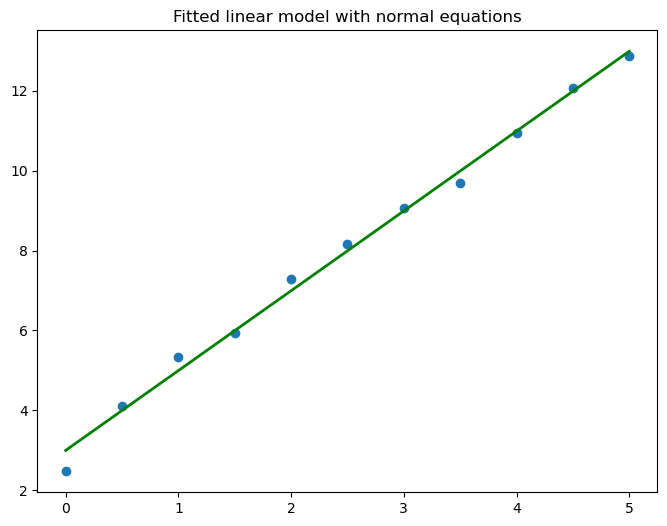

In [15]:
xline = np.array([x[0],x[-1]])
yline = beta2[0]+beta2[1]*xline
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y,label='Data')
plt.plot(xline,yline,color='g',linewidth=2,linestyle='-',label='Fitted model')
plt.title("Fitted linear model with normal equations")
plt.show()

#### Solving the normal equations through the QR decomposition

Recall that we saw that we could solve $X^T X \hat{\beta}=X^T y$ efficiently if we had the QR decomposition of $X$.
We have $X=QR$, with $Q$ orthogonal and $R$ upper triangular, so
$$ X^T X = R^TQ^TQR = R^TR$$
and
$$ X^T y = R^T Q^T y$$
so our problem reduces to
$$R \hat{\beta} = Q^T y$$

In [16]:
Q,R = npl.qr(X)

beta3 = npl.solve(R, Q.T@y)
print(beta3)

[2.99741335 1.99828196]


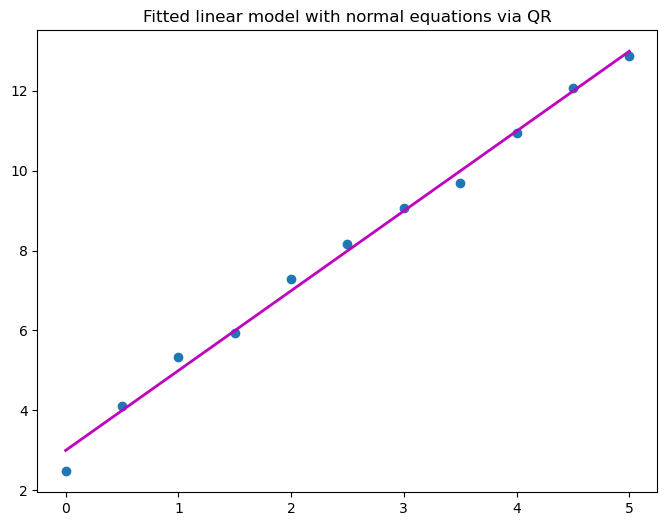

In [17]:
xline = np.array([x[0],x[-1]])
yline = beta3[0]+beta3[1]*xline
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y,label='Data')
plt.plot(xline,yline,color='m',linewidth=2,linestyle='-',label='Fitted model')
plt.title("Fitted linear model with normal equations via QR")
plt.show()

### Solve the optimisation problem using gradient descent

The optimisation problem can be easily solved via the gradient descent method.
The idea is to start from a given approximation $\beta^{(0)}$ and to update it following the direction of the antigradient, which is the direction of steepest descent of the objective function at each point. The process generates a sequence of solution estimates $\{\beta^{(k)}\}$ which, under certain hypotheses, converges to the true solution.

In [18]:
def grad_desc_4_LS(A,b,x,tol,maxit): 
    xvec = [x]
    res = A@x-b
    alpha = (npl.norm(res) / npl.norm(res@A))**2
    gradx = A.T@(res)
    funcx = npl.norm(res)**2
    iter = 0
    converged = False
    while not converged and iter<maxit:
        x = x - alpha*gradx
        xvec = np.vstack([xvec,x])
        res = A@x-b
        alpha = (npl.norm(res) / npl.norm(res@A))**2
        gradx = A.T@(res)
        funcx = np.hstack([funcx,npl.norm(res)**2])
        iter += 1
    
    return x,xvec.T,funcx
    

In [19]:
beta4 = np.array([0,0])
tol=1.e-5
maxit = 5

beta4,betavec,funvec = grad_desc_4_LS(X,y,beta4,tol,maxit)

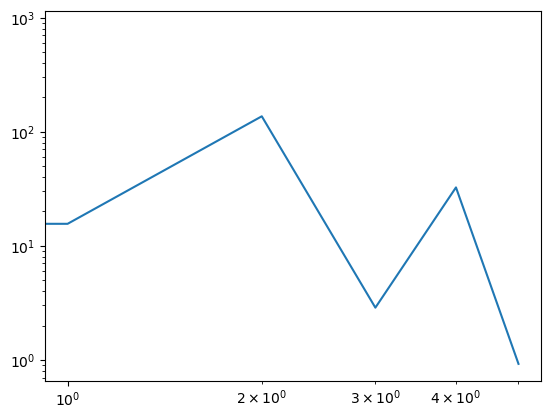

In [20]:
plt.loglog(funvec)
plt.show()

In [21]:
xx = np.linspace(0,3,200)
yy = np.linspace(0,3,200)
Xgrid,Ygrid = np.meshgrid(xx,yy)
Z = np.zeros((200,200))

for i in range(200):
    for j in range (200):
        Z[i,j] = npl.norm(X@[Xgrid[i,j],Ygrid[i,j]]-y)**2

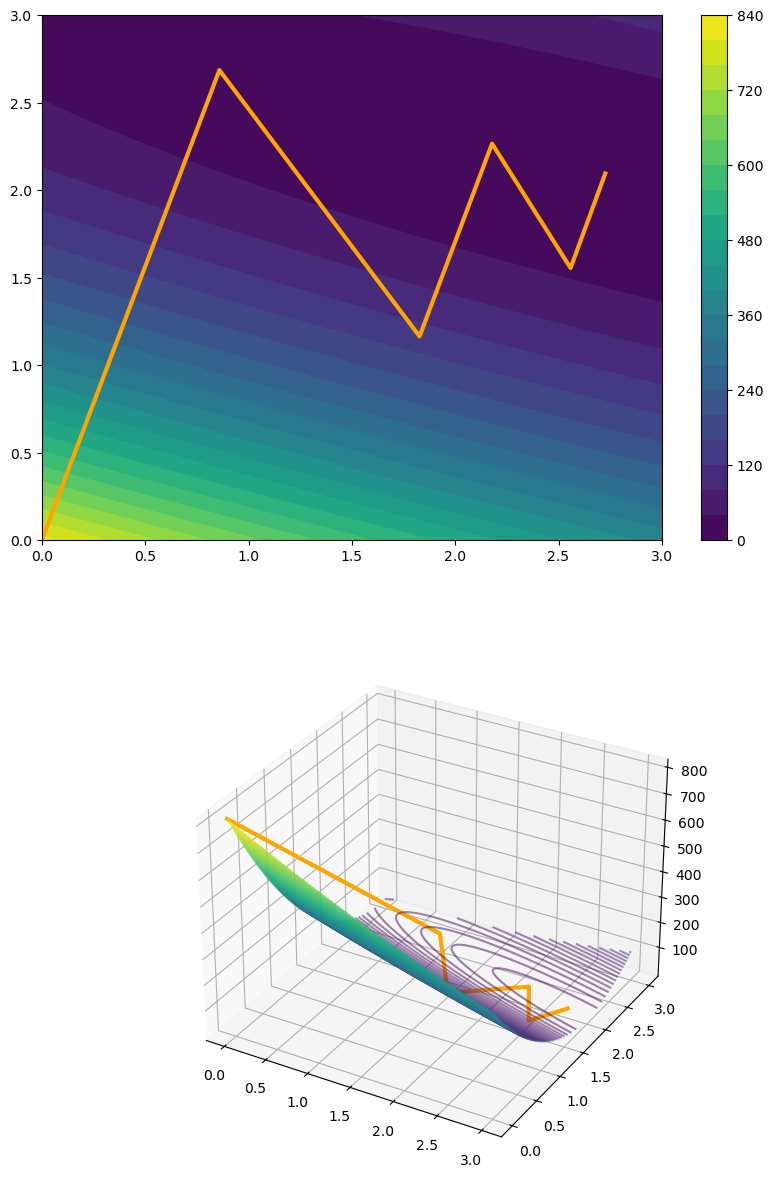

In [22]:
fig = plt.figure(figsize=(10,15))

ax = fig.add_subplot(2, 1, 1)
plt.contourf(Xgrid,Ygrid,Z, levels=25)
plt.colorbar()
plt.plot(betavec[0,:],betavec[1,:], lw = 3, c = "orange")

ax = fig.add_subplot(2, 1, 2, projection='3d')
n = 150
ax.contour3D(Xgrid,Ygrid,Z, n, alpha = .5)
ax.plot(betavec[0,:],betavec[1,:],funvec, c = "orange", lw = 3)

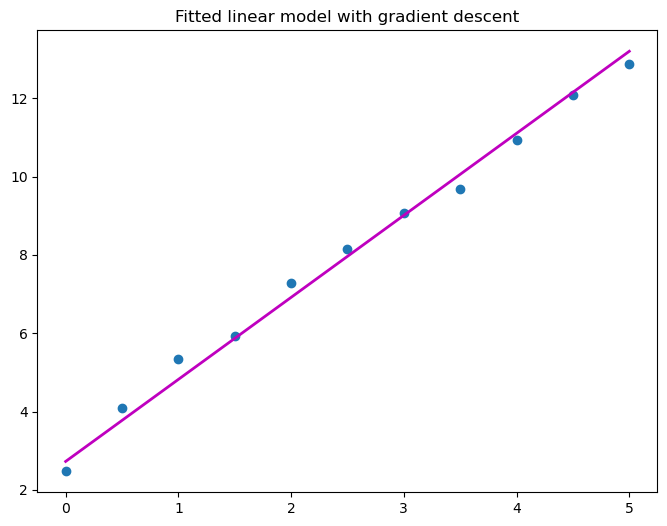

In [23]:
xline = np.array([x[0],x[-1]])
yline = beta4[0]+beta4[1]*xline
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y,label='Data')
plt.plot(xline,yline,color='m',linewidth=2,linestyle='-',label='Fitted model')
plt.title("Fitted linear model with gradient descent")
plt.show()

### Solve the optimisation problem using CVXPY
CVXPY is a package for convex optmisation in Python. We can use it to solve least squares problems as follows.

In [24]:
# Define and solve the CVXPY problem.
beta5 = cp.Variable(2)
cost = cp.sum_squares(X @ beta5 - y)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta5.value)
print("The norm of the residual is ", cp.norm(X @ beta5 - y, p=2).value)


The optimal value is 0.6567914015273777
The optimal beta is
[2.99741335 1.99828196]
The norm of the residual is  0.8104266786868369


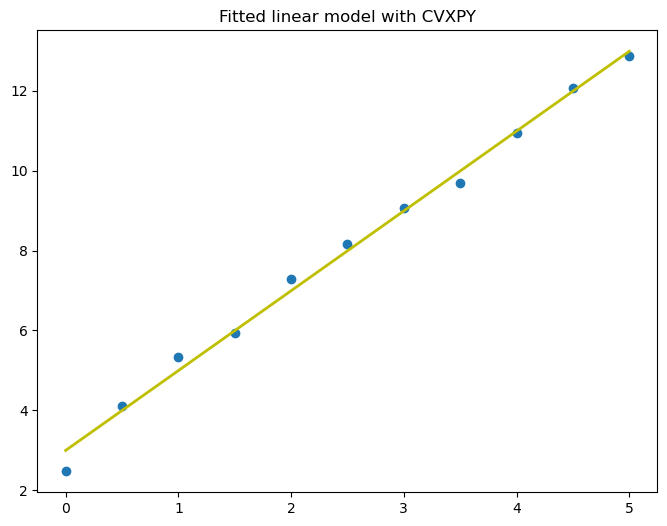

In [25]:
xline = np.array([x[0],x[-1]])
yline = beta5.value[0]+beta5.value[1]*xline
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y,label='Data')
plt.plot(xline,yline,color='y',linewidth=2,linestyle='-',label='Fitted model')
plt.title("Fitted linear model with CVXPY")
plt.show()

### Overfitting and under-fitting

We might think that we could obtain a better fit by introducing more parameters into our model. Similarly we might think that we could save some time by using fewer parameters. While this might be true in some cases, in many cases  it leads to problems of overfitting and under-fitting, respectively. Let's fit three models to the data, one with too few parameters, one with two many, and one with the correct number.

In [26]:
X0 = np.array([np.ones(x.size)]).T
Q,R = npl.qr(X0)
beta0 = npl.solve(R, Q.T@y)

X1 = np.array([x**i for i in range(0,2)]).T
Q,R = npl.qr(X1)
beta1 = npl.solve(R, Q.T@y)

X10 = np.array([x**i for i in range(0,11)]).T
Q,R = npl.qr(X10)
beta10 = npl.solve(R, Q.T@y)

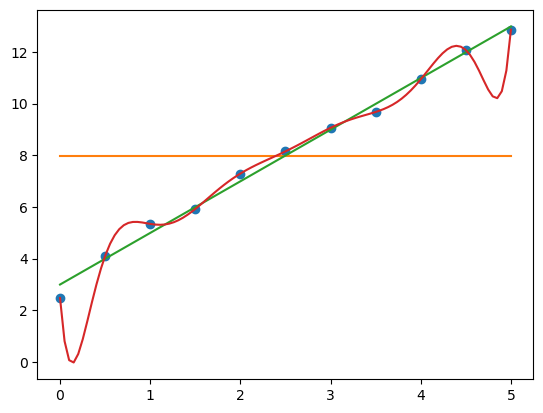

In [27]:
x_dense = np.linspace(x[0],x[-1],100)
X0_dense = np.array([np.ones(x_dense.size)]).T
X1_dense = np.array([x_dense**i for i in range(0,2)]).T
X10_dense = np.array([x_dense**i for i in range(0,11)]).T

plt.plot(x,y,"o",x_dense,X0_dense@beta0,x_dense,X1_dense@beta1,x_dense,X10_dense@beta10)
plt.show()

The green curve representing a 10th order polynomial certainly fits the blue points better (it exactly passes through them all - interpolation!) but it is clearly a worse fit than the orange. We have overfit our model. We could check for this by adding another point (which was not used in the training) and checking if it fits the model.

Similarly, the blue line (0th order polynomial) is an underfit and is not a good model for the data.

### Linear Regression for a nonlinear function (but still linear in parameters)

There is nothing in linear regression that assumes our model must be a liner function of the variables. Try it with the following nonlinear function

In [28]:
xNL = np.linspace(0,2*np.pi,11)
yNL = 3 * np.sin(x) + 0.3*np.random.randn(11)

### Linear Regression in multiple dimensions

It is straightforward to generalise linear regression to data in multiple dimensions. Try it with the data generated using the function
$f(x,y) = x^2 + y^2 + \text{random noise}$ using a model of the form
$$\beta_{0,0} + \beta_{1,0} x + \beta_{0,1} y + \beta_{2,0} x^2 + \beta_{1,1} x y + \beta_{0,2} y^2$$

In [29]:
[x2D, y2D, f2D] = np.array([[x,y,x**2 + y**2 + 0.3*np.random.randn()] for x in np.linspace(-5,5,11) for y in np.linspace(-5,5,11)]).T

### Logistic regression

Finally, let's look at an example of Logistic Regression as a method for recognising handwriting. We will consider the well-known MNIST dataset for handwritten digit recognition. The MNIST dataset was created by the National Institute of Standards and Technology in the US and consists of a set of 70,000 images of size 28 x 28 representing handwritten numbers collected from Census Bureau employees and high school students. We can load it through the sklearn.datasets module.

In [30]:
from sklearn.datasets import fetch_openml

def plot_digit(digit):  
    # A function to plot a vector of length 784 as a 28 x 28 image
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image, cmap = plt.get_cmap('gray'))
    plt.axis("off")
    plt.show()

In [31]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
(X.shape, y.shape)

((70000, 784), (70000,))

The matrix $X$ is of size 70000 x 784. Each row represents an image of a handwritten digit. Let's look at one example:

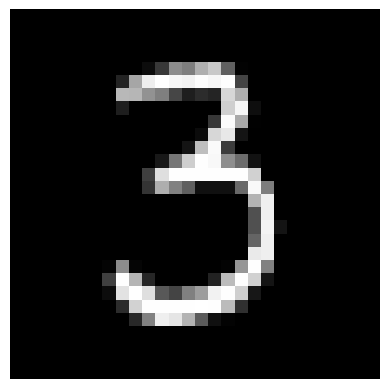

In [32]:
plot_digit(X[50])

The corresponding $y$ value is a human-categorised interpretation of what number the image represents. Let's look again at our example:

In [33]:
y[50]

'3'

For the sake of time, let's consider a simpler problem with only the digits 0 and 1 present:

In [34]:
X_01 = X[np.any([y == "0",y == "1"], axis = 0)] / 255.0
y_01 = y[np.any([y == "0",y == "1"], axis = 0)]

In [35]:
(X_01.shape, y_01.shape)

((14780, 784), (14780,))

We will further split this into training and test data:

In [36]:
X_01_train = X_01[:10000]
y_01_train = y_01[:10000]
X_01_test = X_01[10000:]
y_01_test = y_01[10000:]

Now let's try to fit this data using regression:

In [37]:
lfit = LogisticRegression().fit(X_01_train,y_01_train)

Now let's see how it performs on the training data:

In [38]:
lfit.score(X_01_train, y_01_train)

1.0

Now use the fit to read handwriting:

In [39]:
lfit.predict(X_01_train[:10])

array(['0', '1', '1', '1', '1', '0', '1', '1', '0', '0'], dtype=object)

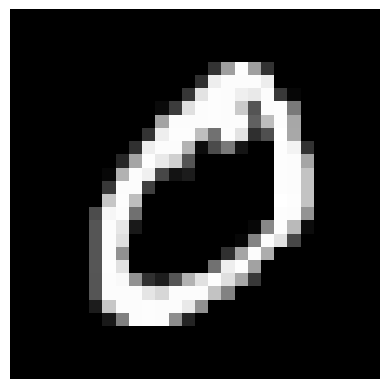

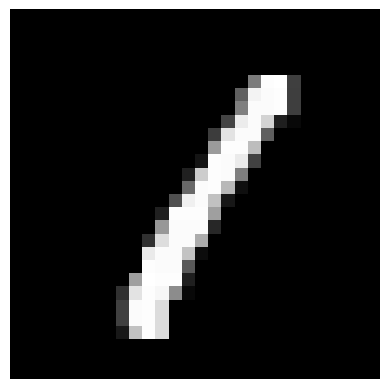

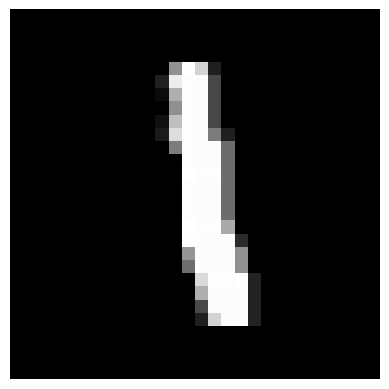

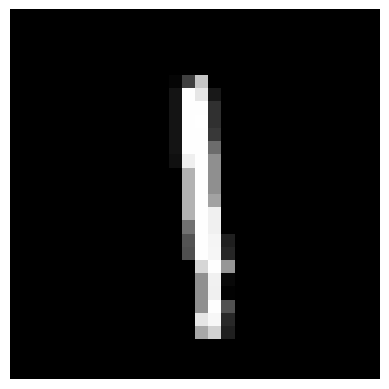

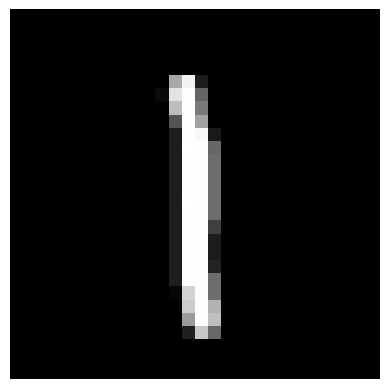

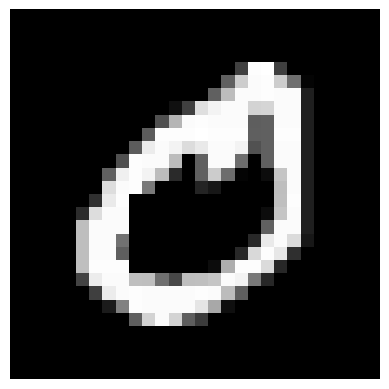

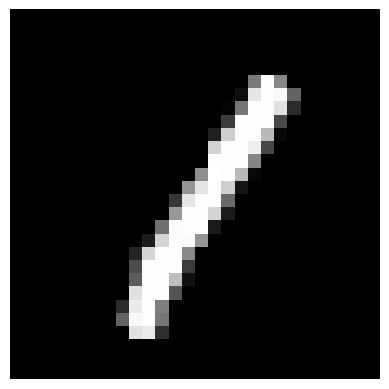

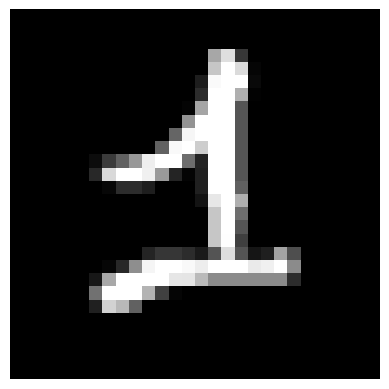

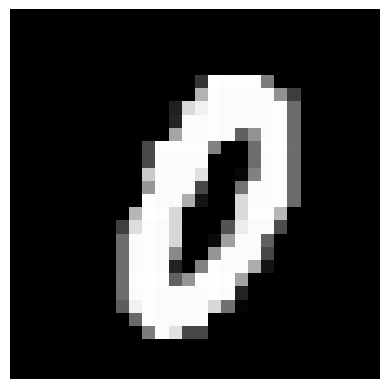

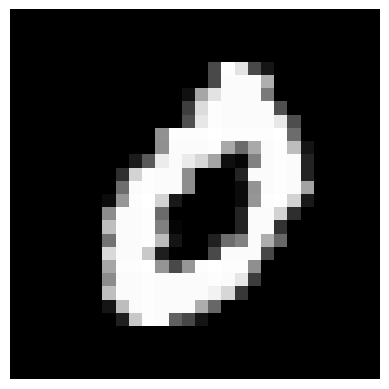

[None, None, None, None, None, None, None, None, None, None]

In [40]:
[plot_digit(d) for d in X_01_train[:10]]

Our model is not quite perfect, but it is very good. Let's try it on the test data:

In [41]:
lfit.score(X_01_test, y_01_test)

0.9997907949790795

In fact, there is just one mistake:

In [42]:
np.where((lfit.predict(X_01_test) == y_01_test) == False)

(array([4696]),)

In [43]:
lfit.predict([X_01_test[4696]])

array(['1'], dtype=object)

In [44]:
y_01_test[4696]

'0'

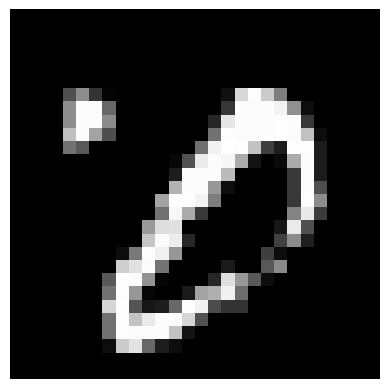

In [45]:
plot_digit(X_01_test[4696])